In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import seaborn as sns
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
import gc
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
# key = "9e75e79c055470945cddfc527587d6ea600f5348"
# #Google's initial public offering (IPO) took place on August 19, 2004.
# df = pdr.get_data_tiingo('GOOGL',start='August 19, 2004', api_key=key)
# df.to_csv('GOOGL.csv')

In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19 00:00:00+00:00,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20 00:00:00+00:00,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23 00:00:00+00:00,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24 00:00:00+00:00,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25 00:00:00+00:00,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,GOOGL,2022-11-14 00:00:00+00:00,95.700,96.7900,94.51,95.09,30179539,95.700000,96.790000,94.510000,95.090000,30179539,0.0,1.0
4593,GOOGL,2022-11-15 00:00:00+00:00,98.440,100.1400,96.71,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16 00:00:00+00:00,98.850,99.6375,97.64,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0
4595,GOOGL,2022-11-17 00:00:00+00:00,98.360,99.2800,96.79,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4597 non-null   object 
 1   date         4597 non-null   object 
 2   close        4597 non-null   float64
 3   high         4597 non-null   float64
 4   low          4597 non-null   float64
 5   open         4597 non-null   float64
 6   volume       4597 non-null   int64  
 7   adjClose     4597 non-null   float64
 8   adjHigh      4597 non-null   float64
 9   adjLow       4597 non-null   float64
 10  adjOpen      4597 non-null   float64
 11  adjVolume    4597 non-null   int64  
 12  divCash      4597 non-null   float64
 13  splitFactor  4597 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 502.9+ KB


In [6]:
df['date'] = df['date'].str.split(' ').str[0]

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,GOOGL,2022-11-14,95.700,96.7900,94.51,95.09,30179539,95.700000,96.790000,94.510000,95.090000,30179539,0.0,1.0
4593,GOOGL,2022-11-15,98.440,100.1400,96.71,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16,98.850,99.6375,97.64,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0
4595,GOOGL,2022-11-17,98.360,99.2800,96.79,96.97,26052599,98.360000,99.280000,96.790000,96.970000,26052599,0.0,1.0


In [8]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.set_index('date')

In [10]:
df

,adjClose
date,
2004-08-19,2.516142
2004-08-20,2.716134
2004-08-23,2.743469
2004-08-24,2.629868
2004-08-25,2.658206
...,...
2022-11-14,95.700000
2022-11-15,98.440000
2022-11-16,98.850000


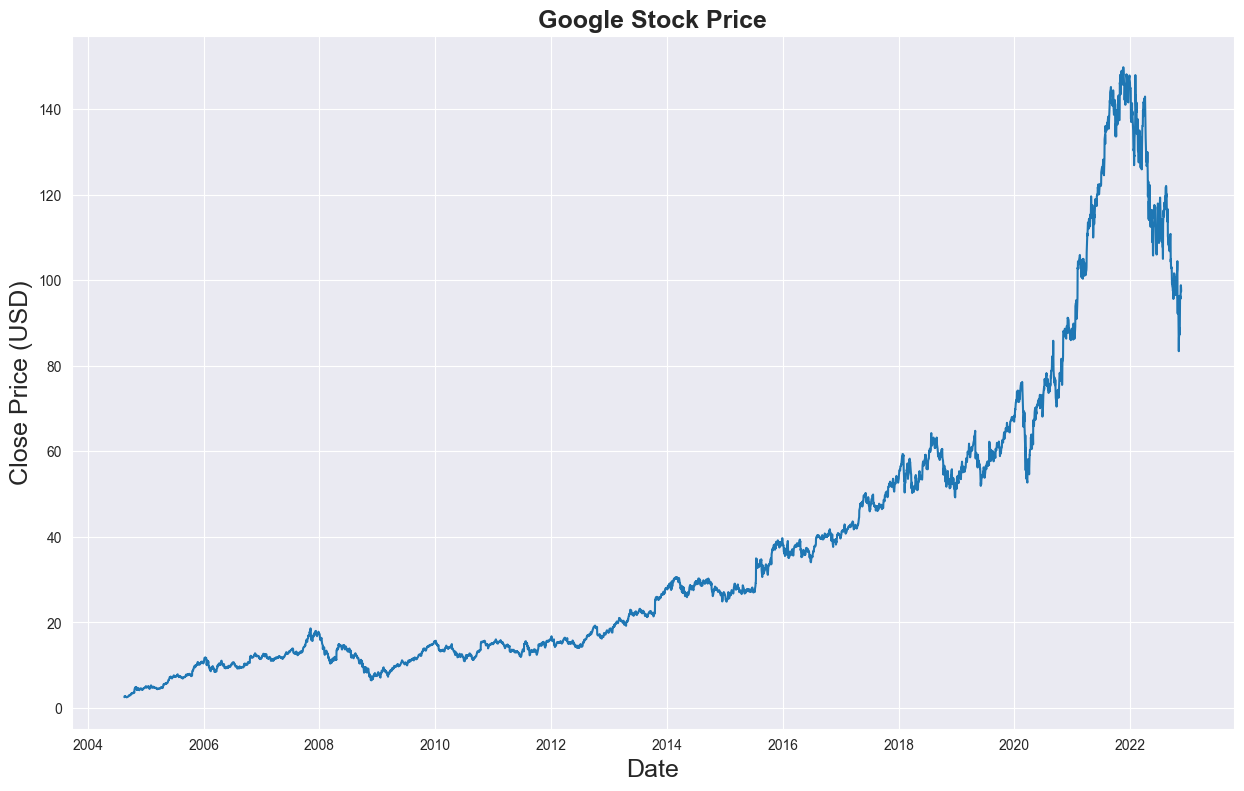

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df['adjClose'] = scaler.fit_transform(np.array(df['adjClose']).reshape(-1, 1))
df_prices =df['adjClose'].values.reshape(-1,1)

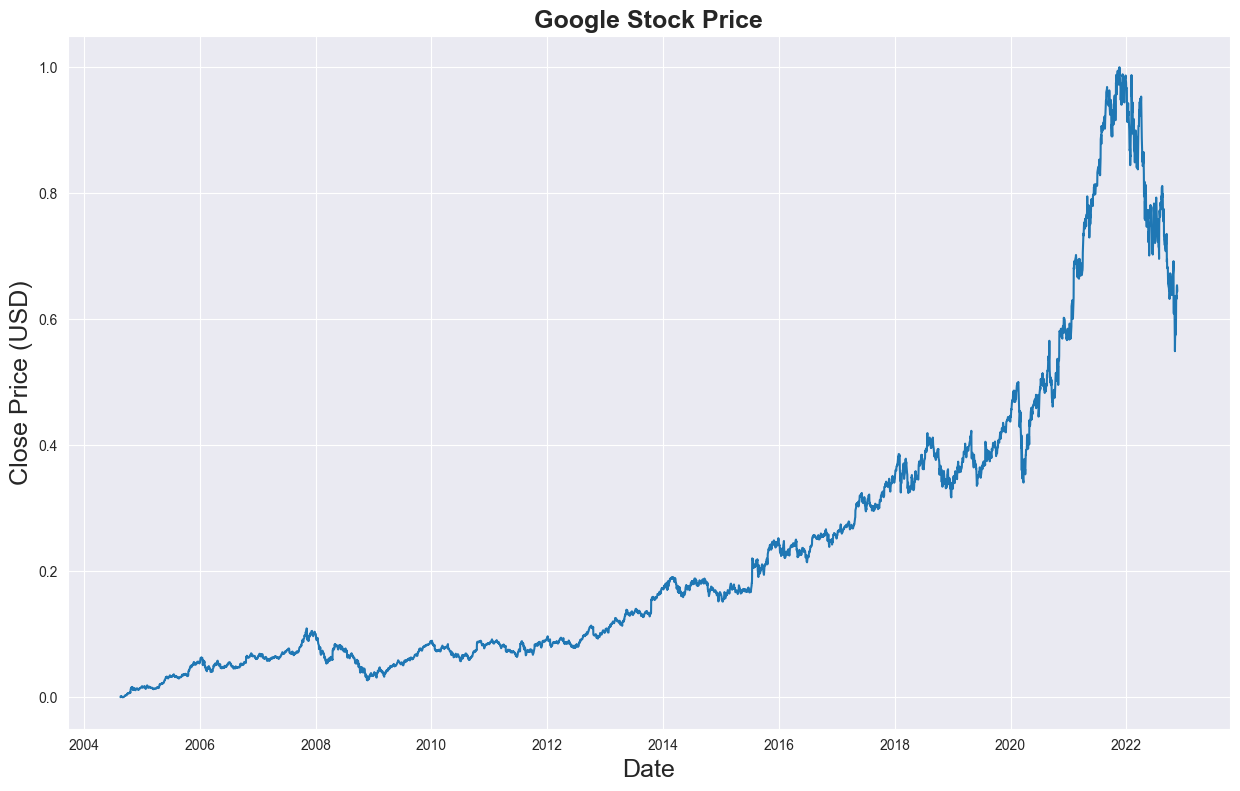

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
# convert an array of values into sequences according to window size
def create_sequence(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [17]:
# convert an array of values into a dataset matrix
def curate_dataset(dataset, time_step):

	##splitting dataset into train valid test split
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	X_train, y_train = create_sequence(train_data, time_step)
	X_val, y_val = create_sequence(val_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test

In [18]:
# Create RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [19]:
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()       

        # Reset gradients
        optimiser.zero_grad()     

        # Compute gradients
        loss.backward()

        # Update parameters           
        optimiser.step()        
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    
    return hist, y_train_pred

In [20]:
def plot_predictions(pred, true):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(x = true.index, y = true[0], label="Data", color='royalblue')
    ax = sns.lineplot(x = pred.index, y = pred[0], label="Training Prediction", color='tomato')
    ax.set_title('Stock price', size = 14, fontweight='bold')
    ax.set_xlabel("Days", size = 14)
    ax.set_ylabel("Cost (USD)", size = 14)
    ax.set_xticklabels('', size=10)

In [21]:
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')

In [22]:
def plotly_predictions(results):  
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [23]:
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()    

In [24]:
def evaluate_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print('Train Score: %.2f RMSE' % (trainScore))
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = scaler.inverse_transform(df_prices[0 : end_of_time]).reshape(-1, 1)    
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
        
    return history, trainScore, valScore, result

In [25]:
# y_train_rnn = torch_data(y_train, device)
# y_train_lstm = torch_data(y_train, device)
# y_train_gru = torch_data(y_train, device)
# y_val_rnn = torch_data(y_val, device)
# y_val_lstm = torch_data(y_val, device)
# y_val_gru = torch_data(y_val, device)
# y_test = torch_data(y_test, device)

In [26]:
#parameters
input_dim = 1
hidden_dim = 20
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
rnn_1 = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
rnn_1 = to_device(rnn_1, device)

#training and evaluating model
history, train_rmse, val_rmse, result = evaluate_model(rnn_1, num_epochs, lr, loss_type, optimiser, time_step)

Epoch  0 MSE:  0.009905566461384296
Epoch  1 MSE:  0.011041953228414059
Epoch  2 MSE:  0.008986788801848888
Epoch  3 MSE:  0.009206038899719715
Epoch  4 MSE:  0.009092377498745918
Epoch  5 MSE:  0.0080161327496171
Epoch  6 MSE:  0.007503397297114134
Epoch  7 MSE:  0.007556801196187735
Epoch  8 MSE:  0.0071023800410330296
Epoch  9 MSE:  0.006182038225233555
Epoch  10 MSE:  0.005559717770665884
Epoch  11 MSE:  0.005316635128110647
Epoch  12 MSE:  0.004632250871509314
Epoch  13 MSE:  0.003635382978245616
Epoch  14 MSE:  0.003177032573148608
Epoch  15 MSE:  0.0025941142812371254
Epoch  16 MSE:  0.0015177519526332617
Epoch  17 MSE:  0.0010327431373298168
Epoch  18 MSE:  0.0005560822319239378
Epoch  19 MSE:  8.575366518925875e-05
Epoch  20 MSE:  0.0005211275420151651
Epoch  21 MSE:  0.0005338342161849141
Epoch  22 MSE:  0.0010849005775526166
Epoch  23 MSE:  0.0008406995330005884
Epoch  24 MSE:  0.0006110199028626084
Epoch  25 MSE:  0.0002360445650992915
Epoch  26 MSE:  9.432683873455971e-05


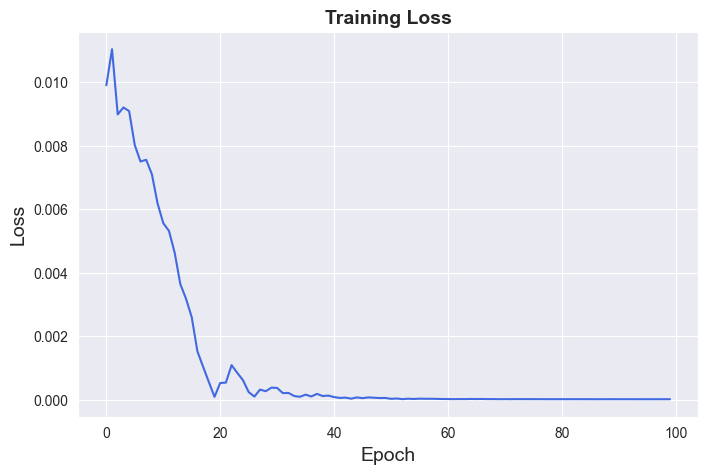

In [27]:
plot_loss(history)

In [28]:
plotly_predictions(result)

In [29]:
gc.collect()
torch.cuda.empty_cache()

In [30]:
#parameters
input_dim = 1
hidden_dim = 30
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 30

#declaring the model
torch.manual_seed(42)
rnn_2 = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
rnn_2 = to_device(rnn_2, device)

#training and evaluating model
history, train_rmse, val_rmse, result = evaluate_model(rnn_2, num_epochs, lr, loss_type, optimiser, time_step)

Epoch  0 MSE:  0.12822310626506805
Epoch  1 MSE:  0.09834927320480347
Epoch  2 MSE:  0.07612006366252899
Epoch  3 MSE:  0.056961819529533386
Epoch  4 MSE:  0.04200355336070061
Epoch  5 MSE:  0.028121795505285263
Epoch  6 MSE:  0.015890521928668022
Epoch  7 MSE:  0.007446316536515951
Epoch  8 MSE:  0.011716055683791637
Epoch  9 MSE:  0.019011717289686203
Epoch  10 MSE:  0.017801830545067787
Epoch  11 MSE:  0.013087687082588673
Epoch  12 MSE:  0.009900214150547981
Epoch  13 MSE:  0.007923138327896595
Epoch  14 MSE:  0.007155919913202524
Epoch  15 MSE:  0.00716981990262866
Epoch  16 MSE:  0.007558801677078009
Epoch  17 MSE:  0.008038093335926533
Epoch  18 MSE:  0.008397608064115047
Epoch  19 MSE:  0.008575539104640484
Epoch  20 MSE:  0.008573062717914581
Epoch  21 MSE:  0.00841501820832491
Epoch  22 MSE:  0.008141204714775085
Epoch  23 MSE:  0.007800680119544268
Epoch  24 MSE:  0.007444615475833416
Epoch  25 MSE:  0.007118497043848038
Epoch  26 MSE:  0.006856955587863922
Epoch  27 MSE:  0

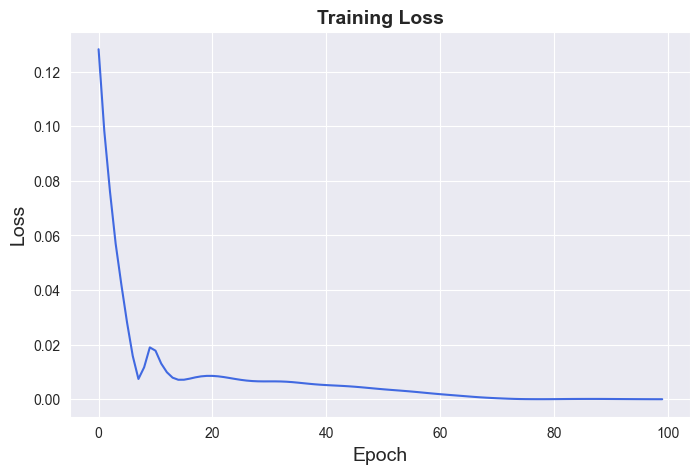

In [31]:
plot_loss(history)

In [32]:
plotly_predictions(result)

In [33]:
#parameters
input_dim = 1
hidden_dim = 100
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 100

#declaring the model
torch.manual_seed(42)
rnn_3 = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
rnn_3 = to_device(rnn_3, device)

#training and evaluating model
history, train_rmse, val_rmse, result = evaluate_model(rnn_3, num_epochs, lr, loss_type, optimiser, time_step)

Epoch  0 MSE:  0.022651368752121925
Epoch  1 MSE:  0.017977764829993248
Epoch  2 MSE:  0.01195947639644146
Epoch  3 MSE:  0.009445074014365673
Epoch  4 MSE:  0.009384876117110252
Epoch  5 MSE:  0.009862509556114674
Epoch  6 MSE:  0.009795413352549076
Epoch  7 MSE:  0.009158791974186897
Epoch  8 MSE:  0.008412114344537258
Epoch  9 MSE:  0.007956390269100666
Epoch  10 MSE:  0.007837541401386261
Epoch  11 MSE:  0.007579222321510315
Epoch  12 MSE:  0.007020301651209593
Epoch  13 MSE:  0.006164171267300844
Epoch  14 MSE:  0.005592528730630875
Epoch  15 MSE:  0.005009544547647238
Epoch  16 MSE:  0.003995989914983511
Epoch  17 MSE:  0.0026081795804202557
Epoch  18 MSE:  0.0015295377233996987
Epoch  19 MSE:  0.0005041570402681828
Epoch  20 MSE:  0.00036989880027249455
Epoch  21 MSE:  0.001514152274467051
Epoch  22 MSE:  0.0016919990302994847
Epoch  23 MSE:  0.000665671075694263
Epoch  24 MSE:  6.568607204826549e-05
Epoch  25 MSE:  0.0002627602661959827
Epoch  26 MSE:  0.0005785353132523596
Epo

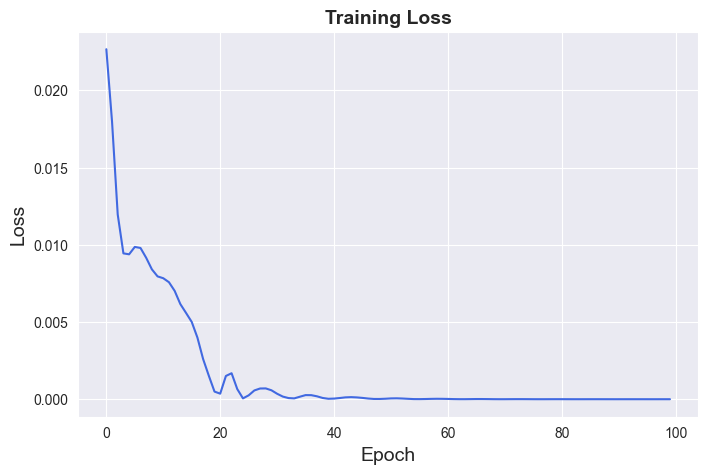

In [34]:
plot_loss(history)

In [35]:
plotly_predictions(result)

# LSTM Model

In [36]:
gc.collect()
torch.cuda.empty_cache()

In [37]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [38]:
#parameters
input_dim = 1
hidden_dim = 100
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam
time_step = 100

#declaring the model
torch.manual_seed(42)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
history_lstm, train_rmse_1, val_rmse_1, result_1 = evaluate_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

Epoch  0 MSE:  0.013017232529819012


RuntimeError: CUDA out of memory. Tried to allocate 2.68 GiB (GPU 0; 6.00 GiB total capacity; 1.08 GiB already allocated; 789.00 MiB free; 3.50 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
plot_loss(history)

In [ ]:
plotly_predictions(result_1)

In [ ]:
# import math, time
# from sklearn.metrics import mean_squared_error

# # make predictions
# y_val_pred = model_2(X_val)

# # invert predictions
# y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
# y_train = scaler.inverse_transform(y_train_lstm.cpu().detach().numpy())
# y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
# y_val = scaler.inverse_transform(y_val_lstm.cpu().detach().numpy())

# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
# print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(df_prices)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred

# # shift test predictions for plotting
# valPredictPlot = np.empty_like(df_prices)
# valPredictPlot[:, :] = np.nan
# valPredictPlot[len(y_train_pred) + (lookback*2) + 1: len(y_train_pred) + len(y_val_pred) +(lookback*2) + 1, :] = y_val_pred

# original = scaler.inverse_transform(df_prices.reshape(-1,1))

# predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
# predictions = np.append(predictions, original, axis=1)
# result = pd.DataFrame(predictions)
# result = pd.concat([result, df_dates], axis = 1)

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

# fig = go.Figure()
# fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[0],
#                     mode='lines',
#                     name='Train prediction')))
# fig.add_trace(go.Scatter(x=result['date'], y=result[1],
#                     mode='lines',
#                     name='Test prediction'))
# fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[2],
#                     mode='lines',
#                     name='Actual Value')))
# fig.update_layout(
#     xaxis=dict(
#         title_text='Dates',
#         titlefont=dict(
#             family='Rockwell',
#             size=12,
#             color='white',
#         ),
#         showline=True,
#         showgrid=True,
#         showticklabels=True,
#         linecolor='white',
#         linewidth=2,
#         ticks='outside',
#         tickfont=dict(
#             family='Rockwell',
#             size=12,
#             color='white',
#         ),
#     ),
#     yaxis=dict(
#         title_text='Close (USD)',
#         titlefont=dict(
#             family='Rockwell',
#             size=12,
#             color='white',
#         ),
#         showline=True,
#         showgrid=True,
#         showticklabels=True,
#         linecolor='white',
#         linewidth=2,
#         ticks='outside',
#         tickfont=dict(
#             family='Rockwell',
#             size=12,
#             color='white',
#         ),
#     ),
#     showlegend=True,
#     template = 'plotly_dark'

# )

# annotations = []
# annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
#                               xanchor='left', yanchor='bottom',
#                               text='Results (LSTM)',
#                               font=dict(family='Rockwell',
#                                         size=26,
#                                         color='white'),
#                               showarrow=False))
# fig.update_layout(annotations=annotations)

# fig.show()

# GRU

In [ ]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100
lr = 0.01

In [ ]:
torch.manual_seed(42)
model_3 = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
model_3 = to_device(model_3, device)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

In [ ]:
history, y_train_pred = fit(num_epochs, lr, model_3, criterion, y_train_gru, optimiser)

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.cpu().detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.cpu().detach().numpy()))
original = pd.concat([original, date_train], axis = 1)

In [ ]:
plot_predictions(predict, original)

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_val_pred = model_3(X_val)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.cpu().detach().numpy())
y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
y_val = scaler.inverse_transform(y_val_gru.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred

# shift test predictions for plotting
valPredictPlot = np.empty_like(df_prices)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(y_train_pred) + (lookback*2) + 1: len(y_train_pred) + len(y_val_pred) +(lookback*2) + 1, :] = y_val_pred

original = scaler.inverse_transform(df_prices.reshape(-1,1))

predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)
result = pd.concat([result, df_dates], axis = 1)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result['date'], y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        title_text='Dates',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (GRU)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()